# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

## **Step 1 : Import Neccessary Libraries**

Start by importing necessary libraries for data munipulation, visualization and machine learning modeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# **Step 2 : Loading and Exploring the Dataset**

this method is used to display the first few rows of the dataset, giving a glimpse of its structure and contents.

In [ ]:
df = pd.read_csv('/content/Mobile_Price_Data (1).csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


## **Step 3 : Cleaning the data and Remove Missing Data**

  In this stage to detect any absent values and unusual instances within the dataset. We use .isnull().sum() to spot missing values and replace them with the median using .fillna(). This process guarantees that the dataset is free from inconsistencies and prepared for analysis.

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for any abnormal instances
print(df.describe())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64
       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000

In [ ]:
# Replace missing values with the median
df = df.fillna(df.median())

# this step to recheck missing values
replaced_missingval = df.isnull().sum()
print("Replaced Missing Value")

print(replaced_missingval)

Replaced Missing Value
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


# **Step 5 : Check for correlation between features and the target variable**
We'll analyze the correlation between 'price range' and other features and select the variables we believe are relevant for predicting the price range

In [ ]:
correlation_matrix = df.corr()
correlation = correlation_matrix['price_range'].sort_values(ascending=False)
print(correlation)

price_range      1.000000
ram              0.917039
battery_power    0.200723
px_width         0.165668
px_height        0.148858
int_memory       0.044169
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000155
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


Based on the correlation matrix and domain knowledge, select the features that are most correlated with the target variable 'price range'. Then, proceed with splitting the dataset into training and testing sets.

## **Step 6 : Split the dataset into training and testing dataset**

The dataset is separated into input features (X) and the target variable (y). Next, it is divided into training and testing sets using the train_test_split() function from scikit-learn. The split ratio selected is 80% for training and 20% for testing. Therefore in this case I chose 4 features includes ram, bettery power, px_width, and px_height which are top 4 the highest correlation.




In [ ]:
# Selecting features 'ram', 'battery_power', 'px_width', and 'px_height' for X, and 'price_range' for y
features = ['ram', 'battery_power', 'px_width', 'px_height']
X = df[features]
y = df['price_range']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

# Confirming the sizes of the splits to ensure the ratio
sizes = (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Sizes of splits:", sizes)


Sizes of splits: ((1600, 4), (400, 4), (1600,), (400,))


The results show

*   (1600, 4) is the shape of the X_train dataset. It means that there are 1,600 examples has 4 features( ram, bettery power, px_width, px_height)
*   (400,4_) is the shape of the X_test dataset, presenting there are 400 examples in the test set with the same 4 features as the training set.


*   (1600, ) This presents the shape of he y_train dataset, which is the set of target variable(price_range) corresponding to the X_train dataset. There are 1,600 labels here, one for each training example.
*   (400, ) This is the shape of the y_test dataset, containing 400 target variables for the test set, one for each test set.






## **Step 7 : Train a logistic regression model and evaluate its performance.**

In [ ]:
# Instantiate a logistic regression model with a maximum of 1000 iterations
logistic_model = LogisticRegression(max_iter=1000)

# Train the logistic regression model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_predicted = logistic_model.predict(X_train)
y_test_predicted = logistic_model.predict(X_test)

# Assess the accuracy of the model
training_accuracy = accuracy_score(y_train, y_train_predicted)
testing_accuracy = accuracy_score(y_test, y_test_predicted)

# Display the accuracy scores
print("Accuracy on the training set:", training_accuracy)
print("Accuracy on the testing set:", testing_accuracy)

Accuracy on the training set: 0.960625
Accuracy on the testing set: 0.96


# **Step 8 : Performance Evaluation**


After training the logistic regression model and assessing its performance, we achieved accuracy rates of approximately 96.06% on the training set and 96.00% on the testing set. These accuracy scores reflect the percentage of correctly predicted instances within each dataset. The high accuracy score on the testing set, closely aligned with that of the training set, implies that the model generalizes effectively to new data, showcasing its proficiency in making precise predictions.

## **Step 9 : Train a KNN model**

In [ ]:
# Instantiate a KNN model with 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn_classifier.fit(X_train, y_train)

# Predict the target variable on both training and testing sets
y_train_predicted_knn = knn_classifier.predict(X_train)
y_test_predicted_knn = knn_classifier.predict(X_test)

# Calculate the accuracy of the KNN model on both sets
training_accuracy_knn = accuracy_score(y_train, y_train_predicted_knn)
testing_accuracy_knn = accuracy_score(y_test, y_test_predicted_knn)

# Output the accuracy scores
print("Accuracy on the training set:", training_accuracy_knn)
print("Accuracy on the testing set:", testing_accuracy_knn)


Accuracy on the training set: 0.949375
Accuracy on the testing set: 0.92


We employed k = 5 for the KNN model. The model demonstrated commendable performance, achieving an accuracy of 95% during training. Although the accuracy slightly decreased to 92% during testing, this marginal difference could suggest some degree of overfitting. However, the 92% accuracy on the test set indicates that the model generalizes well to unseen data.

## **Step 10 : Tuning the hyper-parameter K**

In [ ]:
# Tuning Hyperparameters for KNN
# Utilizing GridSearchCV for hyperparameter tuning
# Defining a range of k values to test
param_grid = {'n_neighbors': np.arange(1, 30)}

# Creating a KNN model
knn_classifier = KNeighborsClassifier()

# Implementing GridSearchCV with 5-fold cross-validation
grid_search_knn = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fitting GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Extracting the best parameters and the accuracy for the optimal k
best_k_knn = grid_search_knn.best_params_['n_neighbors']
best_cv_accuracy_knn = grid_search_knn.best_score_
best_knn_model = grid_search_knn.best_estimator_

# Predicting on the test set using the best k
y_test_pred_best_k = best_knn_model.predict(X_test)
best_test_accuracy_knn = accuracy_score(y_test, y_test_pred_best_k)

print("Best k:", best_k_knn)
print("Best k Accuracy:", best_cv_accuracy_knn)
print("Best test Accuracy:", best_test_accuracy_knn)



Best k: 21
Best k Accuracy: 0.9256250000000001
Best test Accuracy: 0.945


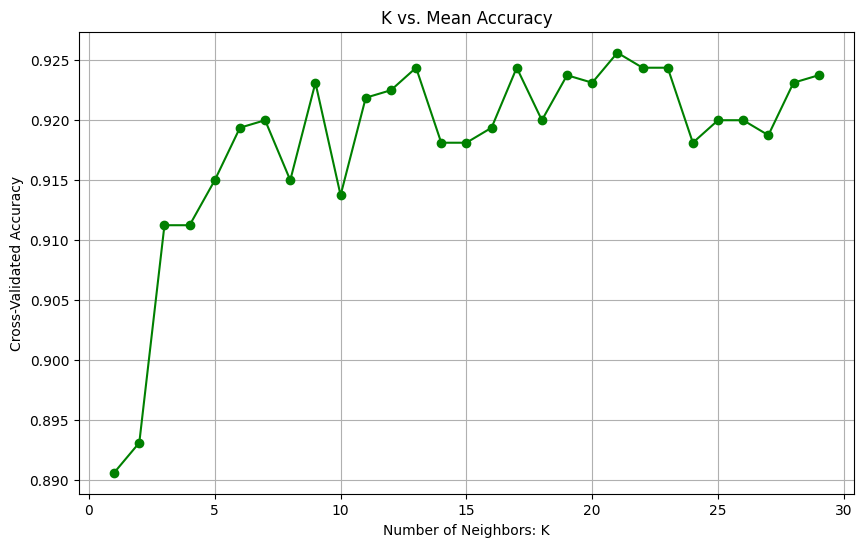

In [ ]:
mean_test_scores_knn = grid_search_knn.cv_results_['mean_test_score']
k_values_knn = np.arange(1, 30)

plt.figure(figsize=(10, 6))
plt.plot(k_values_knn, mean_test_scores_knn, marker='o', linestyle='-', color='g')  # Changing color to green
plt.xlabel('Number of Neighbors: K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K vs. Mean Accuracy')
plt.grid(True)
plt.show()


The plot illustrates a sharp increase in accuracy as K increase from 1 to approximately 7, indicating that a single nearest neighbor isn't a reliable predictor, while a small cluster of neighbors stabilizes predictions. While
K around 7, the accuracy improvement becomes less pronounced, and the curve levels off with some fluctuations, suggesting that adding more neighbors does not significantly improve the model's accuracy. The peak accuracy occurs at K=21, identified as the optimal number of neighbors with the highest cross-validated accuracy (~0.926), as confirmed in the output. This indicates that employing 21 neighbors strikes the best balance between bias and variance for the dataset. Finally, the test accuracy at K=21 is 0.495 which is over the cross-validation accuracy. Moreover, it indicates that the model effectively generalizes well to unseen data

## Tassara Jedsameanmai 48188964